# *ENT3R - H2o AutoML to predict housing prices*

### Load libraries

In [1]:
# You can easily install the library using pip
!pip install h2o

  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112126 sha256=02f7ec1efb7f679d02fa403018990df8d722cd97db5cdc9dfb76d641a809777d
  Stored in directory: c:\users\tobias hyldmo\appdata\local\pip\cache\wheels\51\21\0c\746203762bf4493f01425b6574f85c2099881fa59228074d14
Successfully built h2o


In [2]:
# And then load the libraries you'll use in this notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import h2o
from h2o.automl import H2OAutoML

In [3]:
# Initialize your cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from C:\anaconda\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\TOBIAS~1\AppData\Local\Temp\tmpr918gsbe
  JVM stdout: C:\Users\TOBIAS~1\AppData\Local\Temp\tmpr918gsbe\h2o_Tobias_Hyldmo_started_from_python.out
  JVM stderr: C:\Users\TOBIAS~1\AppData\Local\Temp\tmpr918gsbe\h2o_Tobias_Hyldmo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_Tobias_Hyldmo_3lak7j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.971 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


### Load train and test datasets

In [6]:
train = h2o.import_file('data/train.csv')
test = h2o.import_file('data/test.csv')
train.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,

### EDA, Data Processing and Feature Engineering

I won't perform neither EDA nor Feature Engineering as these are not the focus of this kernel. At least not an extensive one. Here I'll only drop registers whose `GrLivArea` are above 4500 and log transform the target variable `SalePrice`.

In [7]:
train = train[train['GrLivArea'] < 4500]
train['SalePrice'] = train['SalePrice'].log1p()

### Using H2o AutoML

The H2OAutoML function is quite easy to use. You specify the dataset you will use for training at `training_frame`, while `x` and `y` receives the column names of the features which will be used and the name of the target variable, respectively.

You can customize your AutoML to fit your needs. You can add or exclude algorithms, set nfolds for cross-validation, choose metrics, use validation sets, early stopping and so on. Please check the documentation at http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [8]:
# Identify predictors and response
x = [col for col in train.columns if col not in ['Id','SalePrice']]
y = 'SalePrice'
test_id = test['Id']

Let's now create our model:

In [11]:
aml = H2OAutoML(max_models = 1, max_runtime_secs=300, seed = 1, stopping_metric = 'RMSLE')
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
19:50:19.521: AutoML: XGBoost is not available; skipping it.
19:50:19.522: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
19:50:19.522: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_3_20220201_195019


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 0.01606 ),"nlambda = 30, lambda.max = 32.81, lambda.min = 0.01606, lambda.1se...",304,303,25,AutoML_3_20220201_195019_training_py_3_sid_806f




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.009926662182109965
RMSE: 0.09963263612948302
MAE: 0.07028477975615482
RMSLE: 0.007793609197735483
R^2: 0.9378265403090414
Mean Residual Deviance: 0.009926662182109965
Null degrees of freedom: 1457
Residual degrees of freedom: 1154
Null deviance: 232.78539642915086
Residual deviance: 14.473073461516329
AIC: -1977.4454237490122

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.013407243824510874
RMSE: 0.11578965335689918
MAE: 0.08066081483664383
RMSLE: 0.009061498531336433
R^2: 0.9160266846804281
Mean Residual Deviance: 0.013407243824510874
Null degrees of freedom: 1457
Residual degrees of freedom: 1159
Null deviance: 233.26066584152278
Residual deviance: 19.547761496136854
AIC: -1549.213112794158

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.080781,0.002942,0.078432,0.080653,0.085164,0.081835,0.077821
1,mean_residual_deviance,0.013301,0.002199,0.015283,0.012890,0.015822,0.011763,0.010746
2,mse,0.013301,0.002199,0.015283,0.012890,0.015822,0.011763,0.010746
3,null_deviance,46.652134,4.640328,53.989570,45.268993,44.027664,47.982864,41.991573
4,r2,0.916228,0.013009,0.916882,0.915705,0.895056,0.928560,0.924939
5,residual_deviance,3.879329,0.647296,4.462643,3.763896,4.619899,3.423025,3.127179
6,rmse,0.115013,0.009541,0.123625,0.113534,0.125784,0.108457,0.103664
7,rmsle,0.008991,0.000814,0.009877,0.008816,0.009793,0.008387,0.008083



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_deviance,training_mae,training_r2
0,,2022-02-01 19:50:21,0.000 sec,1,.33E2,304,0.109922,0.117879,0.006004,0.0,NaN,,,,
1,,2022-02-01 19:50:21,0.004 sec,2,.24E2,304,0.098072,0.107005,0.005695,0.0,NaN,,,,
2,,2022-02-01 19:50:21,0.006 sec,3,.17E2,304,0.085299,0.094839,0.005331,0.0,NaN,,,,
3,,2022-02-01 19:50:21,0.008 sec,4,.13E2,304,0.072343,0.081965,0.004917,0.0,NaN,,,,
4,,2022-02-01 19:50:21,0.010 sec,5,.92E1,304,0.059998,0.069147,0.004468,0.0,NaN,,,,
5,,2022-02-01 19:50:21,0.012 sec,6,.67E1,304,0.049016,0.057162,0.004005,0.0,NaN,,,,
6,,2022-02-01 19:50:21,0.015 sec,7,.49E1,304,0.039837,0.046719,0.003553,0.0,NaN,,,,
7,,2022-02-01 19:50:21,0.018 sec,8,.36E1,304,0.032598,0.038148,0.003128,0.0,NaN,,,,
8,,2022-02-01 19:50:21,0.020 sec,9,.26E1,304,0.027139,0.031501,0.002743,0.0,NaN,,,,
9,,2022-02-01 19:50:21,0.023 sec,10,.19E1,304,0.023138,0.026557,0.002406,0.0,NaN,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MSZoning.C (all),0.084844,1.000000,0.024835
1,Neighborhood.Crawfor,0.075575,0.890745,0.022122
2,OverallQual,0.070167,0.827011,0.020539
3,GrLivArea,0.066833,0.787716,0.019563
4,Functional.Typ,0.052383,0.617402,0.015333
5,Neighborhood.StoneBr,0.047993,0.565653,0.014048
6,OverallCond,0.046742,0.550919,0.013682
7,YearBuilt,0.045319,0.534141,0.013265
8,SaleCondition.Abnorml,0.044057,0.519273,0.012896
9,2ndFlrSF,0.043250,0.509754,0.012660



See the whole table with table.as_data_frame()


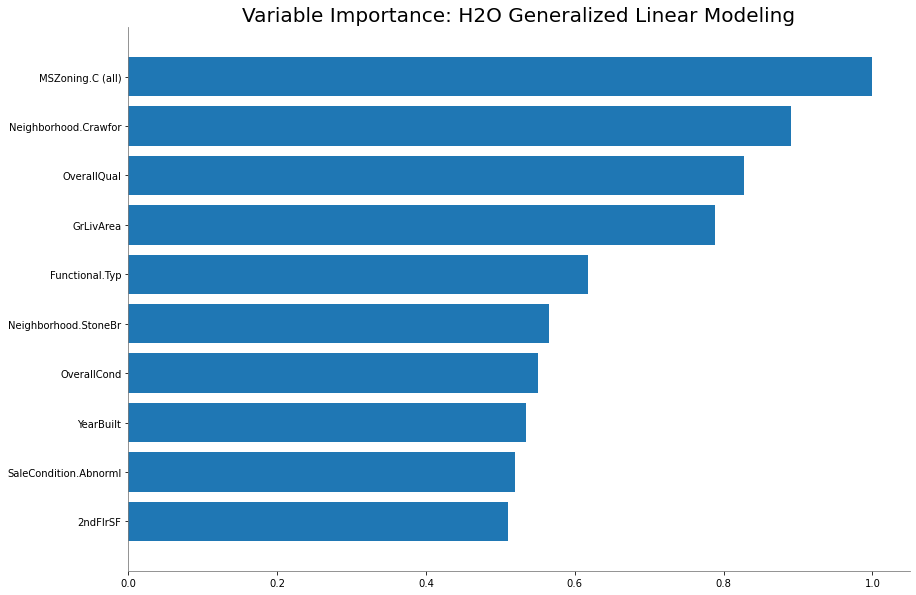

<Figure size 432x288 with 0 Axes>

In [14]:
aml.leader.varimp_plot()

### Predict

You can simply call predict on your best model

In [15]:
preds = aml.leader.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'Exterior2nd' has levels not trained on: ["NA"]
  warnings.warn(w)
C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'Exterior1st' has levels not trained on: ["NA"]
  warnings.warn(w)
C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'SaleType' has levels not trained on: ["NA"]
  warnings.warn(w)
C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'Functional' has levels not trained on: ["NA"]
  warnings.warn(w)
C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'MSZoning' has levels not trained on: ["NA"]
  warnings.warn(w)
C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'KitchenQual' has levels not trained on: ["NA"]
  warnings.warn(w)
C:\anaconda\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validati

In [16]:
# Convert results back(they had been transformed using log, remember?) and save them in a csv format.
result = preds.expm1()
sub = test_id.cbind(result)
sub.columns = ['Id','SalePrice']
sub = sub.as_data_frame()
sub.to_csv('submission.csv', index = False)